scope_440  SNR: 11.07
scope_441  SNR: 11.74
scope_442  SNR: 11.69
scope_443  SNR: 10.90
scope_444  SNR: 11.26
scope_445  SNR: 11.50
scope_446  SNR: 11.60
scope_447  SNR: 11.74
scope_448  SNR: 10.53
scope_449  SNR: 11.02
scope_450  SNR: 10.50
scope_451  SNR: 10.49
scope_452  SNR: 10.86
scope_453  SNR: 12.34
scope_454  SNR: 11.63
scope_455  SNR: 10.61
scope_456  SNR: 12.48
scope_457  SNR: 10.96
scope_458  SNR: 12.28
scope_459  SNR: 12.19
scope_460  SNR: 12.37
scope_461  SNR: 12.35
scope_462  SNR: 11.27
scope_463  SNR: 12.40
scope_464  SNR: 13.68
scope_465  SNR: 12.70
scope_466  SNR: 12.13
scope_467  SNR: 12.96
scope_468  SNR: 11.15
scope_469  SNR: 12.06
scope_470  SNR: 12.36
scope_471  SNR: 10.07
scope_472  SNR: 11.23
scope_473  SNR: 12.56
scope_474  SNR: 11.89
scope_475  SNR: 12.22
scope_476  SNR: 13.23
scope_477  SNR: 14.67
scope_478  SNR: 11.77
scope_479  SNR: 9.91
scope_480  SNR: 13.15
scope_481  SNR: 10.76
scope_482  SNR: 12.89
scope_483  SNR: 12.51
scope_484  SNR: 13.74
scope_485  

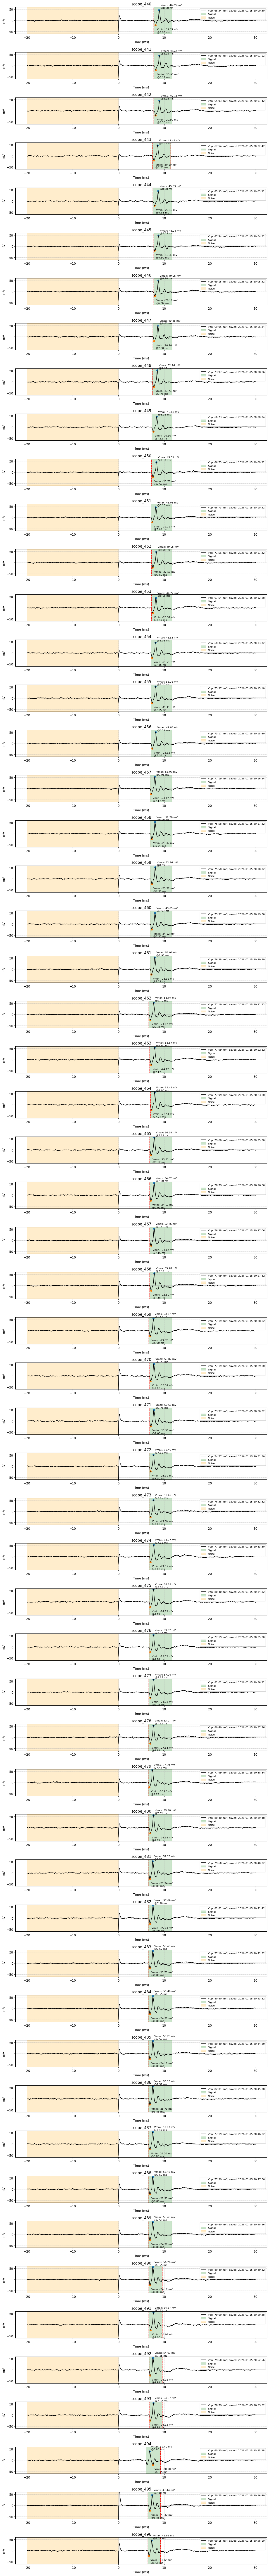

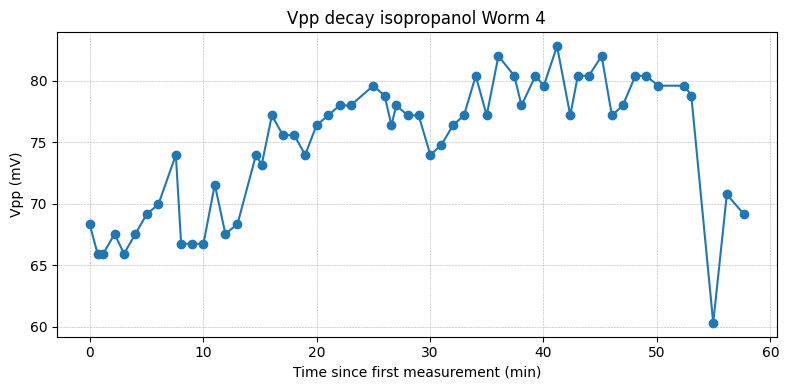

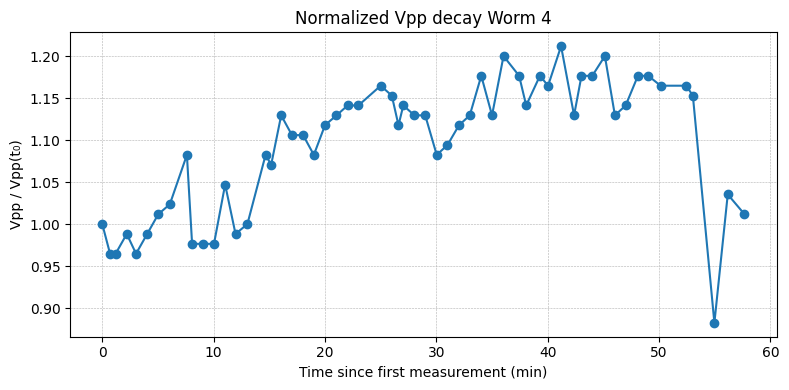


Average SNR (linear): 12.32
Average SNR (dB): 21.81 dB
Average Vpp: 74.83 mV


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
from zoneinfo import ZoneInfo

folder = "Worm 4"
scope_start = 440
num_files = 57

time_windows = [
    (7.7, 11.7),   # Scope_440
    (7.7, 11.7),   # Scope_441
    (7.7, 11.7),   # Scope_442
    (7.4, 11.4),   # Scope_443
    (7.5, 11.7),   # Scope_444
    (7.7, 11.7),   # Scope_445
    (7.7, 11.7),   # Scope_446
    (7.5, 11.7),   # Scope_447
    (7.4, 11.7),   # Scope_448
    (7.3, 11.7),   # Scope_449
    (7.2, 11.7),   # Scope_450
    (7.1, 11.7),   # Scope_451
    (7.2, 11.7),   # Scope_452
    (7.2, 11.7),   # Scope_453
    (7.1, 11.7),   # Scope_454
    (7.1, 11.7),   # Scope_455
    (7.1, 11.7),   # Scope_456
    (6.9, 11.7),   # Scope_457
    (6.9, 11.7),   # Scope_458
    (6.9, 11.7),   # Scope_459
    (6.9, 11.7),   # Scope_460
    (6.9, 11.7),   # Scope_461
    (6.6, 11.7),   # Scope_462
    (6.8, 11.7),   # Scope_463
    (7, 11.7),   # Scope_464
    (6.8, 11.7),   # Scope_465
    (6.8, 11.7),   # Scope_466
    (6.8, 11.7),   # Scope_467
    (6.8, 11.7),   # Scope_468
    (6.6, 11.7),   # Scope_469
    (6.8, 11.7),   # Scope_470
    (6.8, 11.7),   # Scope_471
    (6.7, 11.7),   # Scope_472
    (6.7, 11.7),   # Scope_473
    (6.7, 11.7),   # Scope_474
    (6.7, 11.7),   # Scope_475
    (6.7, 11.7),   # Scope_476
    (6.6, 11.7),   # Scope_477
    (6.5, 11.7),   # Scope_478
    (6.5, 11.7),   # Scope_479
    (6.5, 11.7),   # Scope_480
    (6.5, 11.7),   # Scope_481
    (6.5, 11.7),   # Scope_482
    (6.5, 11.7),   # Scope_483
    (6.5, 11.7),   # Scope_484
    (6.5, 11.7),   # Scope_485
    (6.5, 11.7),   # Scope_486
    (6.5, 11.7),   # Scope_487
    (6.5, 11.7),   # Scope_488
    (6.5, 11.7),   # Scope_489
    (6.6, 9.6),   # Scope_490
    (6.6, 9.6),   # Scope_491
    (6.7, 9.6),   # Scope_492
    (6.8, 9.6),   # Scope_493
    (6, 9.2),   # Scope_494
    (6.4, 9.2),   # Scope_495
    (6.4, 9.2),   # Scope_496
]

vpp_values = []
timestamps = []
snr_values = []

fig1, axes = plt.subplots(num_files, 1, figsize=(12, num_files * 2), sharex=False)

for i in range(num_files):
    scope = scope_start + i
    ax = axes[i]
    file_path = os.path.join(folder, f"scope_{scope}.csv")
    t_start, t_end = time_windows[i]

    df = pd.read_csv(file_path)
    df = df.drop(index=0).reset_index(drop=True)
    df = df.apply(pd.to_numeric)

    t_ms = df["x-axis"].values * 1e3
    ch2_mV = df["2"].values * 1e3

    mtime = os.path.getmtime(file_path)
    ts = datetime.fromtimestamp(mtime, tz=ZoneInfo("Europe/Amsterdam"))
    timestamps.append(ts)
    timestamp_str = ts.strftime("%Y-%m-%d %H:%M:%S")

    signal_mask = (t_ms >= t_start) & (t_ms <= t_end)
    noise_mask = (t_ms >= -20) & (t_ms <= -0.01)

    signal_vals = ch2_mV[signal_mask]
    vmax = np.max(signal_vals)
    vmin = np.min(signal_vals)
    vpp = vmax - vmin
    vpp_values.append(vpp)

    seg_indices = np.where(signal_mask)[0]
    idx_vmax = seg_indices[np.argmax(ch2_mV[seg_indices])]
    idx_vmin = seg_indices[np.argmin(ch2_mV[seg_indices])]
    vmax_t = t_ms[idx_vmax]
    vmin_t = t_ms[idx_vmin]

    signal_vrms = np.sqrt(np.mean(ch2_mV[signal_mask] ** 2))
    noise_vrms = np.sqrt(np.mean(ch2_mV[noise_mask] ** 2))
    snr = signal_vrms / noise_vrms
    snr_values.append(snr)

    print(f"scope_{scope}  SNR: {snr:.2f}")

    ax.plot(
        t_ms,
        ch2_mV,
        linewidth=1.2,
        color="black",
        label=f"Vpp: {vpp:.2f} mV | saved: {timestamp_str}",
    )

    ax.axvline(t_start, color="red", linestyle="--", linewidth=1)
    ax.axvline(t_end, color="red", linestyle="--", linewidth=1)

    ax.fill_between(t_ms, -60, 60, where=signal_mask, color="green", alpha=0.2, label="Signal")
    ax.fill_between(t_ms, -60, 60, where=noise_mask, color="orange", alpha=0.2, label="Noise")

    ax.scatter(vmax_t, vmax, s=30)
    ax.scatter(vmin_t, vmin, s=30)

    ax.annotate(
        f"Vmax: {vmax:.2f} mV\n@{vmax_t:.2f} ms",
        (vmax_t, vmax),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=8,
    )
    ax.annotate(
        f"Vmin: {vmin:.2f} mV\n@{vmin_t:.2f} ms",
        (vmin_t, vmin),
        xytext=(5, -24),
        textcoords="offset points",
        fontsize=8,
    )

    ax.set_ylim(-60, 60)
    ax.set_ylabel("mV")
    ax.set_xlabel("Time (ms)")
    ax.set_title(f"scope_{scope}")
    ax.grid(True, which="both", linestyle="--", linewidth=0.4)
    ax.legend(loc="upper right", fontsize=8)

fig1.tight_layout()
plt.show()

pairs = sorted(zip(timestamps, vpp_values), key=lambda x: x[0])
t0 = pairs[0][0]

time_min = np.array([(ts - t0).total_seconds() / 60.0 for ts, _ in pairs])
vpp_arr = np.array([vpp for _, vpp in pairs])

plt.figure(figsize=(8, 4))
plt.plot(time_min, vpp_arr, "o-")
plt.xlabel("Time since first measurement (min)")
plt.ylabel("Vpp (mV)")
plt.title(f"Vpp decay isopropanol {folder}")
plt.grid(True, which="both", linestyle="--", linewidth=0.4)
plt.tight_layout()
plt.show()

vpp_norm = vpp_arr / vpp_arr[0]

plt.figure(figsize=(8, 4))
plt.plot(time_min, vpp_norm, "o-")
plt.xlabel("Time since first measurement (min)")
plt.ylabel("Vpp / Vpp(t₀)")
plt.title(f"Normalized Vpp decay {folder}")
plt.grid(True, which="both", linestyle="--", linewidth=0.4)
plt.tight_layout()
plt.show()

snr_mean = np.mean(snr_values)
snr_mean_db = 20 * np.log10(snr_mean)
print(f"\nAverage SNR (linear): {snr_mean:.2f}")
print(f"Average SNR (dB): {snr_mean_db:.2f} dB")

vpp_mean = np.mean(vpp_values)
print(f"Average Vpp: {vpp_mean:.2f} mV")